# Singular Value Decomposition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sympy as smp
from IPython.display import display
from scipy.linalg import diagsvd

## Matrix approximation

In [2]:
X = np.random.rand(3,3)
smp.Matrix(X)

Matrix([
[ 0.757269718836343, 0.259981737755784, 0.561324765989219],
[ 0.524536112442058, 0.284966715529379, 0.946790195810975],
[0.0413480784797851, 0.157433085941886, 0.638437299190328]])

In [3]:
u, s, v = np.linalg.svd(X, full_matrices=True)
display("u =", smp.Matrix(u))
display("s =",smp.Matrix(np.diag(s)))
display("v =",smp.Matrix(v))

'u ='

Matrix([
[-0.593873346534501,  0.682812625291612,  0.425536563667905],
[-0.715252418973319, -0.205872904711249, -0.667855017394171],
[-0.368413389317934, -0.700987350704797,  0.610645812826996]])

's ='

Matrix([
[1.55915810151108,                 0,                  0],
[               0, 0.460131271698455,                  0],
[               0,                 0, 0.0170737659338668]])

'v ='

Matrix([
[-0.538836446629701,  -0.26695164116288, -0.798994433687696],
[ 0.826070939027398, 0.0184583967827522, -0.563263784813656],
[-0.165112348047839,  0.963533138438245, -0.210574935957426]])

In [4]:
display("v =",smp.Matrix(u @ np.diag(s) @ v))

'v ='

Matrix([
[ 0.757269718836343, 0.259981737755785, 0.561324765989219],
[ 0.524536112442058, 0.284966715529379, 0.946790195810975],
[0.0413480784797849, 0.157433085941885, 0.638437299190328]])

If the matrix is a skinny and tall you can use the "economy" version

In [5]:
X = np.random.rand(20,2)
smp.Matrix(X)

Matrix([
[ 0.168982152610986,    0.880445823108999],
[ 0.870158545725171,    0.680271117040846],
[ 0.564918191257841,    0.379536815133628],
[ 0.407020948345166,    0.150777752931305],
[  0.38465838946595,    0.650320300303336],
[  0.38451845245475,      0.2142808852006],
[ 0.838521546430516,    0.661240089624019],
[ 0.848801503301165,    0.323390748916362],
[ 0.904604007907683,    0.932455240375466],
[ 0.468554310518036,    0.860592816241503],
[ 0.836096130655695,    0.960775022663233],
[ 0.723090909205637,     0.68841717174671],
[ 0.411566586334228,    0.950937509781868],
[ 0.848558363852671,    0.137461529690942],
[  0.92542042167254,    0.114351602085776],
[ 0.834081576484973, 0.000709040552926643],
[ 0.158929167273547,    0.332089418648687],
[ 0.835369265392425,    0.240012143349121],
[ 0.930424013367426,   0.0850703139034567],
[0.0961895028124671,  0.00667431615945346]])

In [6]:
u, s, v = np.linalg.svd(X, full_matrices=False)
display("u =", smp.Matrix(u))
display("s =",smp.Matrix(np.diag(s)))
display("v =",smp.Matrix(v))

'u ='

Matrix([
[ -0.182579670705469,    0.408143165667162],
[ -0.297865460091086, -0.00211374641290252],
[ -0.183026458501696,  -0.0352777711544029],
[   -0.1114216398893,  -0.0923925003414362],
[ -0.189945744586177,    0.189930192066752],
[ -0.117235910516962,  -0.0480642040664556],
[ -0.287986184368445,  0.00107614635388174],
[ -0.233851971127092,   -0.187784284193428],
[ -0.347202693524659,    0.120780120648514],
[ -0.242780684137637,    0.268716482579966],
[ -0.337399239381098,    0.165647462679502],
[  -0.26804450127337,   0.0654607033303263],
[ -0.245758006887767,    0.342501249640283],
[ -0.202809266174936,   -0.289187440918872],
[ -0.215252222677643,   -0.334796416169731],
[ -0.176945890098463,   -0.357633069683338],
[-0.0890469581465785,    0.113084697647271],
[ -0.217106538234542,   -0.227538956130626],
[  -0.21143231843678,   -0.352930186753759],
[-0.0215049447834234,  -0.0376444423117515]])

's ='

Matrix([
[3.7080729959915,                0],
[              0, 1.43992369760716]])

'v ='

Matrix([
[-0.786122194556169, -0.618071108551591],
[-0.618071108551591,  0.786122194556169]])

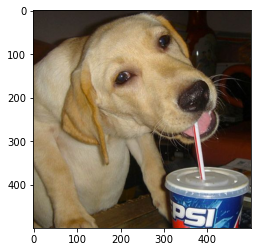

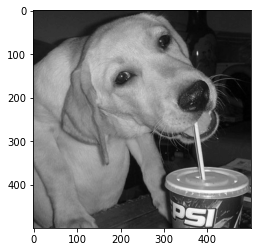

In [7]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img_rgb = mpimg.imread('pepsi-dog.jpg')
img_gray = rgb2gray(img_rgb)

plt.imshow(img_rgb)
plt.show()
plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
u, s, vT = np.linalg.svd(img_gray, full_matrices=False)

Cumulative energy of the sinuglar values

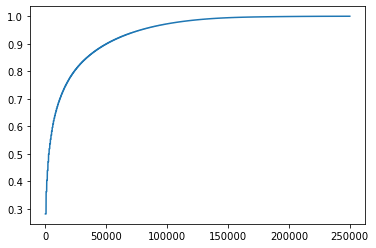

In [9]:
energy = np.cumsum(np.diag(s))/np.sum(np.diag(s))
plt.plot(energy)
plt.show()

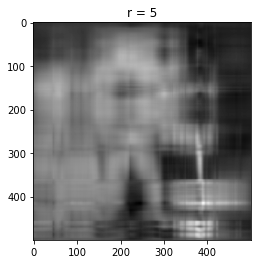

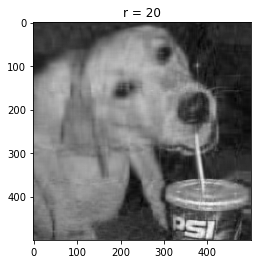

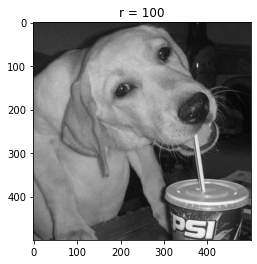

In [10]:
for i in [5, 20, 100]:
    Xapprox = u[:,:i]@np.diag(s)[:i,:i]@vT[:i,:]
    plt.imshow(Xapprox, cmap=plt.get_cmap('gray'))
    new_shape = np.shape(Xapprox)

    plt.title('r = ' + str(i))
    plt.show()

If we left or right-multiply our data matrix X by a unitary transformation, it preserves the terms in the SVD, except for the corresponding 
left or right unitary matrix U or V, respectively. This has important implications, since the
discrete Fourier transform $\mathcal{F}$ is a unitary transform, meaning that the
SVD of data X'= $\mathcal{F}$ X will be exactly the same as the SVD of X, except that the modes
U' will be be the DFT of modes U: U' = $\mathcal{F}$ U. In

## Inverse

In [11]:
X = np.random.rand(3,2)
display("X =", smp.Matrix(X))
u, s, v = np.linalg.svd(X, full_matrices=True)
display("u =", smp.Matrix(u))
display("s =",smp.Matrix(diagsvd(s,X.shape[0],X.shape[1])))
display("v =",smp.Matrix(v))

'X ='

Matrix([
[0.0864438945304794,  0.374103289217434],
[ 0.968886726092014,  0.855246850441306],
[ 0.523155744582142, 0.0242654420965099]])

'u ='

Matrix([
[-0.218533353559616,  0.595071709496817,  0.773390479601685],
[-0.928029036514999,  0.118274033901789, -0.353232728225517],
[-0.301670815239113, -0.794921954320759,  0.526397003954082]])

's ='

Matrix([
[1.3916783937646,                 0],
[              0, 0.393860983330644],
[              0,                 0]])

'v ='

Matrix([
[-0.773071360351191, -0.63431906151775],
[ -0.63431906151775, 0.773071360351191]])

In [12]:
X_inv = v.T @ np.reciprocal(diagsvd(s,*X.shape),where = diagsvd(s,*X.shape)!=0).T@u.T
display("X^-1 =", smp.Matrix(X_inv))

'X^-1 ='

Matrix([
[-0.836977636866415, 0.325034019440923, 1.44781065188529],
[  1.26761455003274, 0.655138913936482, -1.4227750409627]])

In [13]:
display(smp.Matrix(X_inv@X))

Matrix([
[                 1.0, -6.24500451351651e-17],
[3.33066907387547e-16,                   1.0]])

## PCA

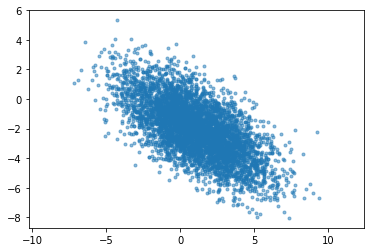

In [14]:
cov = np.array([[6, -3], [-3, 3.5]])
pts = np.random.multivariate_normal([1, -2], cov, size=5000)

plt.plot(pts[:, 0], pts[:, 1], '.', alpha=0.5)
plt.axis('equal')
plt.show()

In [15]:
u, s, v = np.linalg.svd(pts, full_matrices=True)
s = diagsvd(s,*pts.shape)
s

array([[248.41999328,   0.        ],
       [  0.        , 105.0898669 ],
       [  0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ]])

In [16]:
mean_x, mean_y = np.mean(pts, axis = 0)

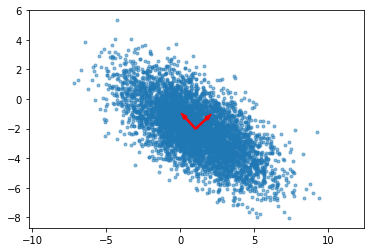

In [17]:
plt.plot(pts[:, 0], pts[:, 1], '.', alpha=0.5)
plt.arrow(mean_x,mean_y,v[0][0],v[0][1], width = 0.1, zorder = 4, color = 'r')
plt.arrow(mean_x,mean_y,v[1][0],v[1][1], width = 0.1, zorder = 4, color = 'r')
plt.axis('equal')
plt.show()

## Optimal truncation

### Toy example

In [18]:
t = np.arange(-3,3,0.01)

Utrue = np.array([np.cos(17*t)*np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[2,0],[0,0.5]])
Vtrue = np.array([np.sin(5*t)*np.exp(-t**2), np.cos(13*t)])

X = Utrue@Strue@Vtrue

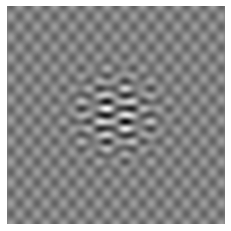

In [19]:
plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

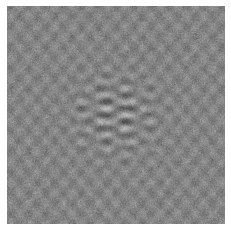

In [20]:
sigma = 3/2
X_prime = X + np.random.randn(*X.shape)
plt.imshow(X_prime)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

In [21]:
u,s,vt = np.linalg.svd(X_prime ,full_matrices = False)
median_sigma = np.median(s)

In [22]:
beta = X_prime.shape[1]/X_prime.shape[0]

def lamda(beta):
    return np.sqrt(2*(beta+1)+(8*beta)/((beta+1)+np.sqrt(beta**2+14*beta+1)))

from scipy.integrate import quad
from scipy.optimize import fsolve


def integrand(t,beta):
    return (np.sqrt(((1+np.sqrt(beta))**2-t)*(t-(1-np.sqrt(beta))**2)))/(2*np.pi*t)


def func(x,beta):
    y, _ = quad(integrand, (1-beta)**2, x, args = (beta))
    return (y - 1/2)

sol = fsolve(func, beta, args = (beta))
sol[0]

0.652775941633578

In [23]:
closed_threshhold = (4)/(np.sqrt(3)) * np.sqrt(X.shape[0]) * sigma  #closed form of a square matrix

print('The closed form for the optimal truncation of a square matrix', closed_threshhold)
print('The numerical optimal truncation', lamda(beta)/sol[0]*median_sigma)

The closed form for the optimal truncation of a square matrix 84.85281374238572
The numerical optimal truncation 70.22914661392842


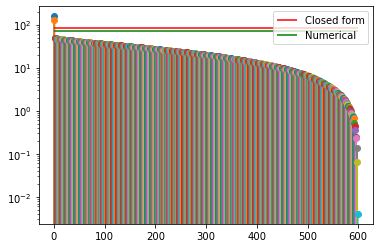

In [24]:
plt.semilogy(np.diag(s),marker='o')
plt.hlines(closed_threshhold,0,len(np.diag(s)), colors= 'r', label = 'Closed form')
plt.hlines(lamda(beta)/sol[0]*median_sigma,0,len(np.diag(s)), colors= 'g', label = 'Numerical')
plt.legend()
plt.show()

Only two r values are above the line, which is correct since we made a matrix with rank two and just added noise to it

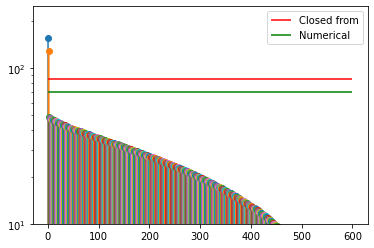

In [25]:
plt.semilogy(np.diag(s),marker='o')
plt.hlines(closed_threshhold,0,len(np.diag(s)), colors= 'r', label = 'Closed from')
plt.hlines(lamda(beta)/sol[0]*median_sigma,0,len(np.diag(s)), colors= 'g', label = 'Numerical')

plt.ylim(10,250)
plt.legend()
plt.show()

## Short coming

The reason that this example breaks down is that the SVD is fundamentally geometric,
meaning that it depends on the coordinate system in which the data is represented. As
we have seen earlier, the SVD is only generically invariant to unitary transformations,
meaning that the transformation preserves the inner product. This fact may be viewed as
both a strength and a weakness of the method. First, the dependence of SVD on the inner
product is essential for the various useful geometric interpretations. Moreover, the SVD has
meaningful units and dimensions. However, this makes the SVD sensitive to the alignment
of the data. In fact, the SVD rank explodes when objects in the columns translate, rotate,
or scale, which severely limits its use for data that has not been heavily pre-processed.

## Random SVD

If you belive that there is an intrinsic lol level rank r in you huge matrix you can use rSVD to get a good approx of the "pure" SVD


you wish to find the "SVD of X

Get a random matrix P (with a give width r)

Z = XP

QR decomp. Z

Z = QR

Y = Q.TX

SVD of Y

Y = UySV.T

The S and V.T will be the same as for the "pure" SVD of X

Ux = QUy

shape (2000, 1155)


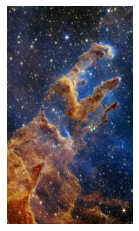

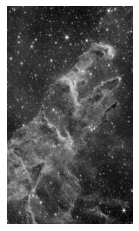

In [37]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img_rgb = mpimg.imread('web.png')
img_gray = rgb2gray(img_rgb)
print('shape',img_gray.shape)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [49]:
r = 500
p = 10

P = np.random.rand(img_gray.shape[1],r+p) #where p is some extra columns (called power sampling)

Z = np.dot(img_gray,P)

Q,R = np.linalg.qr(Z, mode='reduced')

Y = np.dot(Q.T,img_gray)

Uy, s, vt = np.linalg.svd(Y, full_matrices=False)

u = np.dot(Q,Uy)

In [50]:
new_X = np.dot(u,np.dot(np.diag(s),vt))

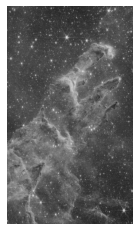

In [51]:
plt.imshow(new_X)
plt.axis('off')
plt.show()